In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [9]:
os.getcwd()

'/Users/divyasarika/Downloads/adv stat/week 3/mentor'

In [10]:
os.chdir('/Users/divyasarika/Downloads/adv stat/week 3')

In [11]:
os.getcwd()

'/Users/divyasarika/Downloads/adv stat/week 3'

In [12]:
data = pd.read_csv('cancer.csv')
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


 ### Id columns is to identify rows hence can be skipped in analysis
   ### All columns have numerical values
  ### since our objective is to determine which kind, Class would be the target variable. Should be removed when PCA is done
  ### to reduce the columns, to know the patients health status is our objective in this case study
  ### unsupervised learning - no target variable or no variable trying to predict 

In [13]:
data.shape

(699, 11)

In [14]:
data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [15]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Bare nuclei is taken as object typeeven thoughit has numerical values

In [17]:
data['Bare Nuclei'].unique() #returns how many different values does that column have

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

**lets check what ? is** 

In [18]:
data.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

no missing values

In [19]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

data[data['Bare Nuclei']=='?']

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [20]:
data[data['Bare Nuclei']=='?'].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

## 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
## Here we would like to impute it with suitable values

In [21]:
data['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [22]:
# We would impute by using mode (we can also look for advane imputation such as knn imputation in fancyimpute package)

data['Bare Nuclei'].replace("?",'1', inplace=True)

data['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [23]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int64')

In [28]:
dupes = data.duplicated()


print('Number of duplicated rows is %d'% (dupes.sum()))

data[dupes]

Number of duplicated rows is 9


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [29]:
# To check for duplicates by column

pd.concat(g for _, g in data.groupby("ID") if len(g) > 1).count()


ID                             100
ClumpThickness                 100
Cell Size                      100
Cell Shape                     100
Marginal Adhesion              100
Single Epithelial Cell Size    100
Bare Nuclei                    100
Normal Nucleoli                100
Bland Chromatin                100
Mitoses                        100
Class                          100
dtype: int64

In [30]:
# Remove duplicate rows

print('Number of rows before discarding duplicates = %d' % (data.shape[0]))

data.drop_duplicates(subset = None, keep = 'first', inplace=True)

print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 690


## correlation

In [31]:
data.corr(method= 'pearson')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


### Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
### and bland chromatin
### Target variable shows high correlation with most of these variables

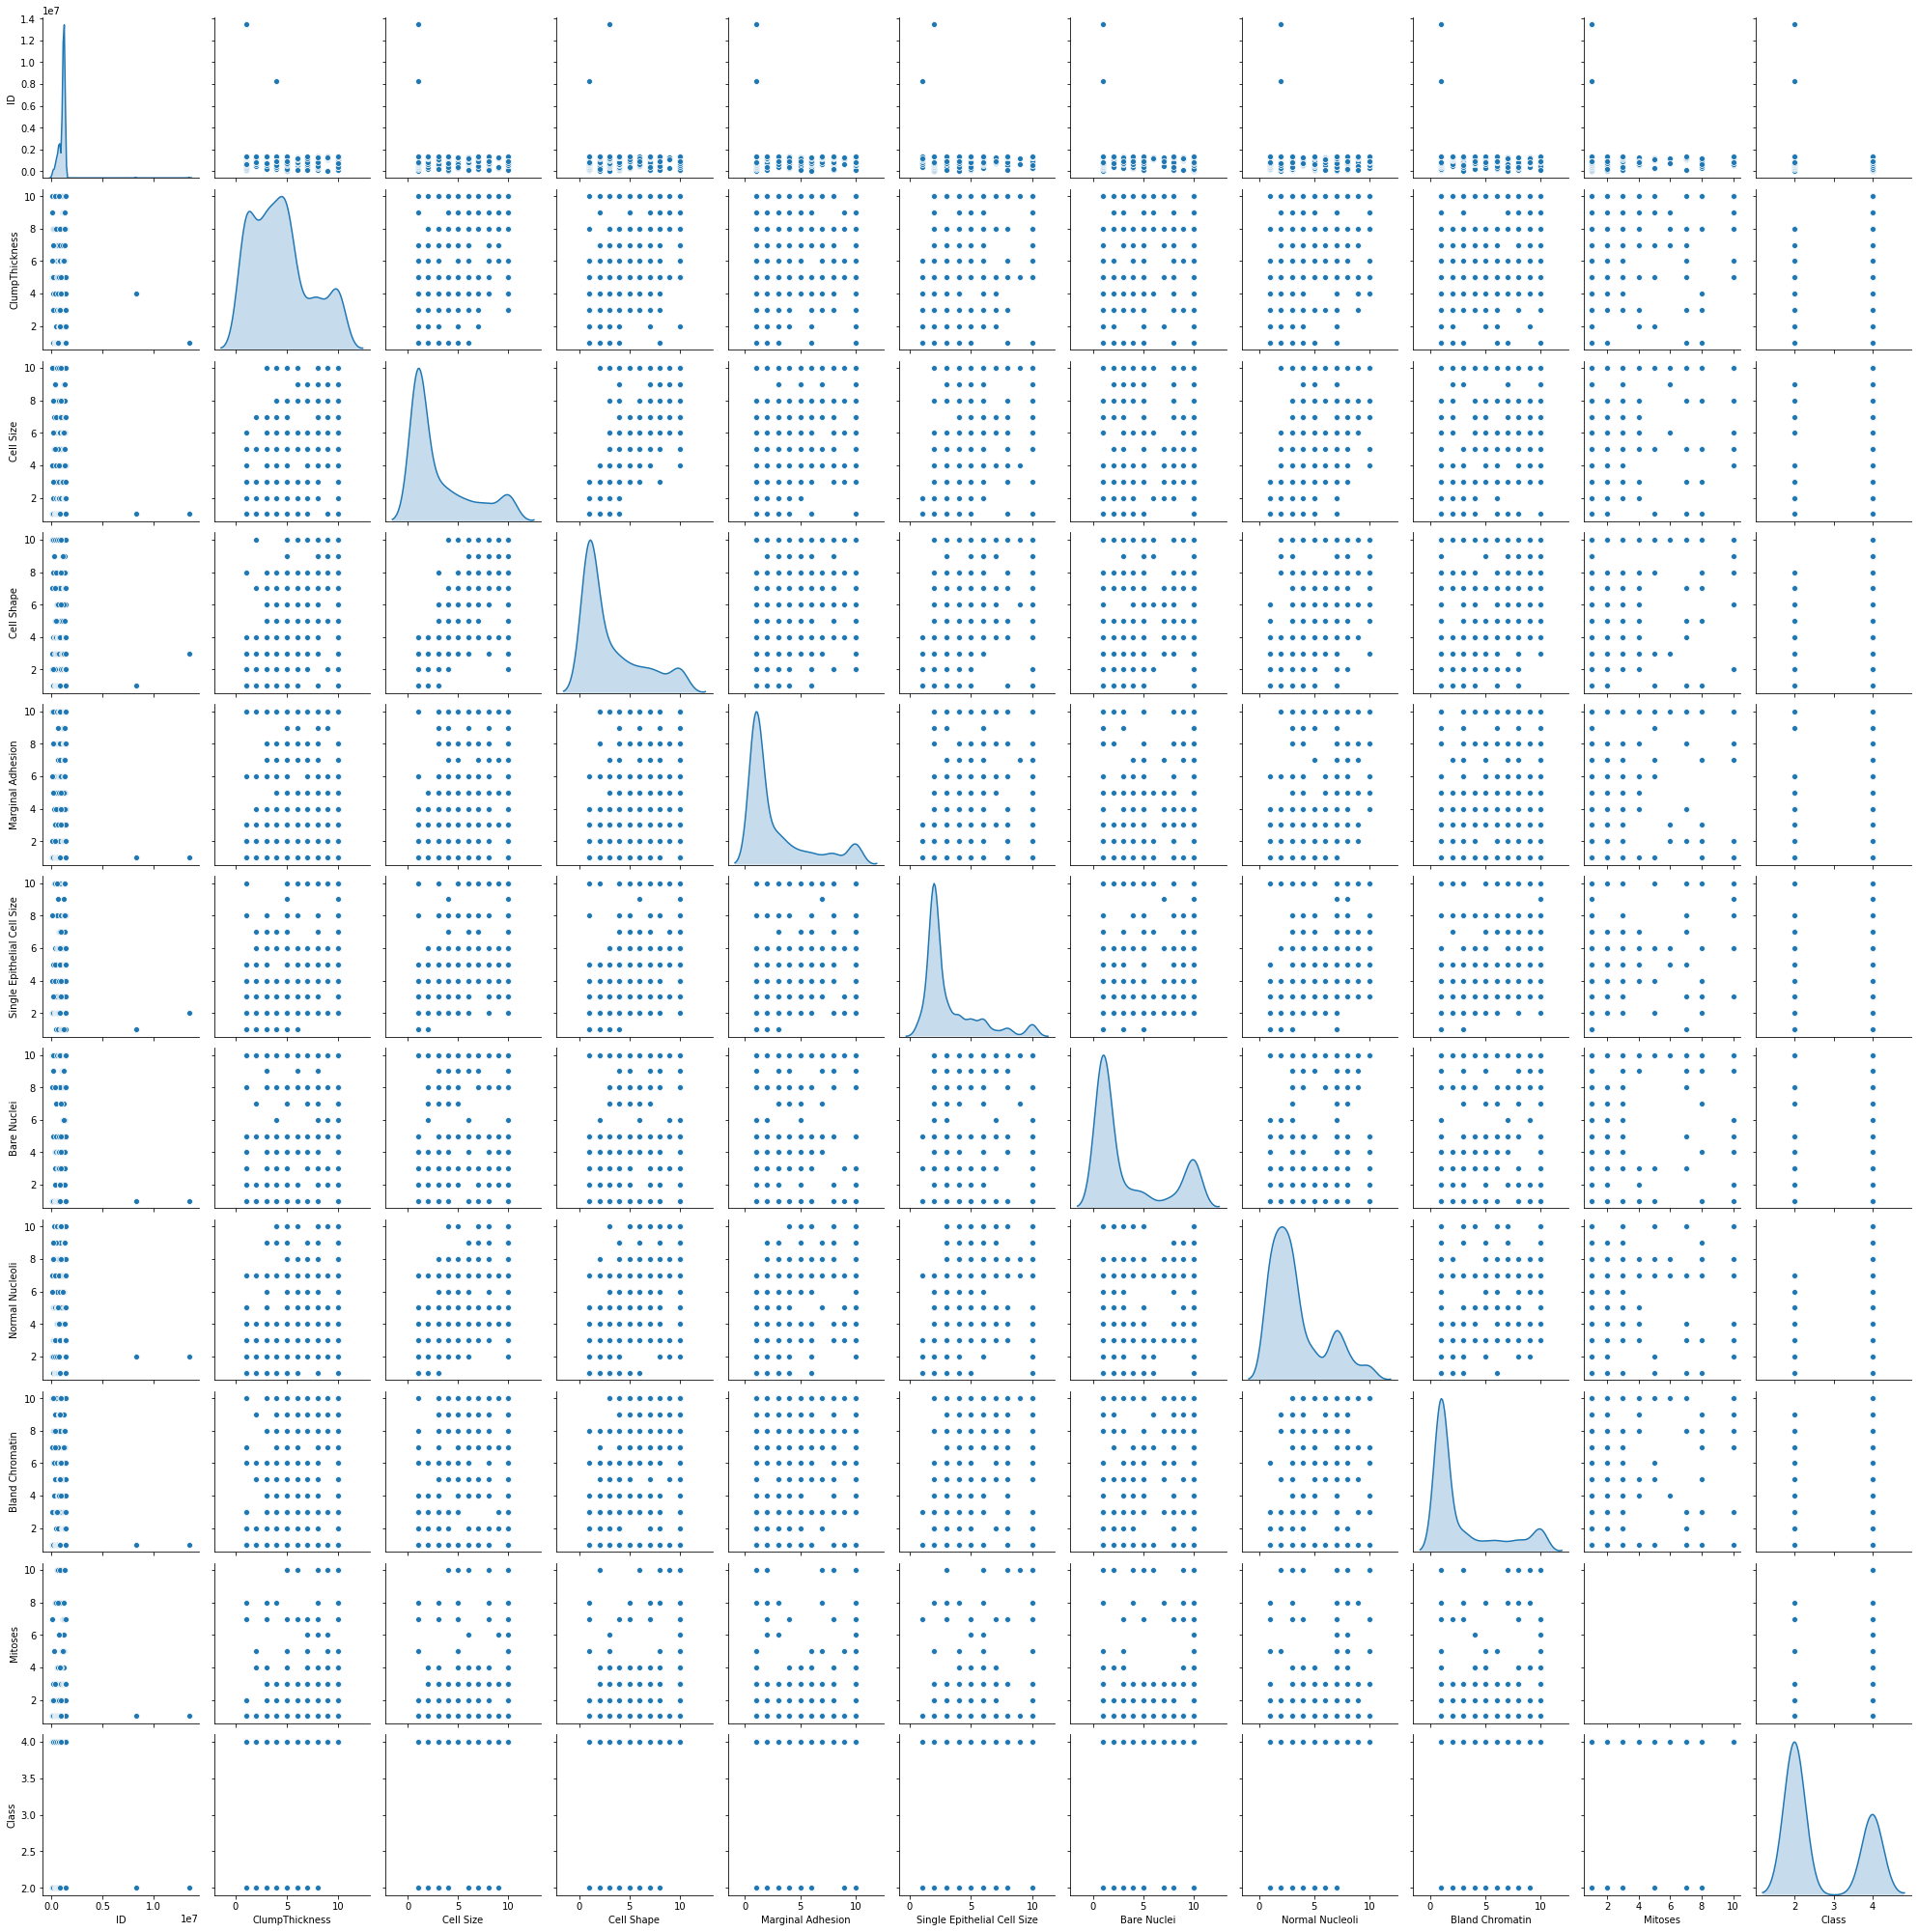

In [32]:
# pair plot

sns.pairplot(data, diag_kind='kde');

### Relationship between variables shows come correlation. 
### Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is between 1 to 10

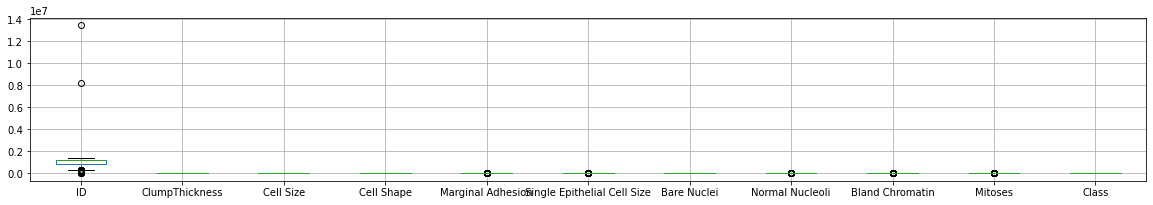

In [33]:
# remove outliers in preprocessing

data.boxplot(figsize=(20,3))


### We could see few outliers here. Possible mode of imputation:
### Remove the outliers by taking anything above 3 sd from mean
### Take logarithmic transformation, it would reduce the variation
### Group few levels

In [34]:
pd.crosstab(data['Marginal Adhesion'],data['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4
